<a href="https://colab.research.google.com/github/agrudkow/spzc-of-rhm/blob/feature%2Fprepare-test/spzc_copy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/agrudkow/spzc-of-rhm.git

Cloning into 'spzc-of-rhm'...
remote: Enumerating objects: 82, done.
remote: Counting objects: 100% (82/82), done.
remote: Compressing objects: 100% (59/59), done.
remote: Total 82 (delta 34), reused 66 (delta 19), pack-reused 0
Unpacking objects: 100% (82/82), done.


In [277]:
%cd spzc-of-rhm
! git checkout feature/prepare-test
! git pull 

/content/spzc-of-rhm
Already on 'feature/prepare-test'
Your branch is up to date with 'origin/feature/prepare-test'.
remote: Enumerating objects: 15, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 11 (delta 3), reused 8 (delta 2), pack-reused 0
Unpacking objects: 100% (11/11), done.
From https://github.com/agrudkow/spzc-of-rhm
   308f8f5..19217ef  feature/prepare-test -> origin/feature/prepare-test
Updating 308f8f5..19217ef
Fast-forward
 dig_test_d1_d3_rip_i2000_t100ms.csv | 2300 +++++++++++++++++++++++++++++++++++
 iperf_rhm.csv                       |    8 +-
 iperf_rip.csv                       |    6 +
 iperf_vip.csv                       |   12 +-
 spzc_plots.ipynb                    |  477 ++++++++
 5 files changed, 2795 insertions(+), 8 deletions(-)
 create mode 100644 dig_test_d1_d3_rip_i2000_t100ms.csv
 create mode 100644 spzc_plots.ipynb


In [278]:
%cd ..

/content


Dig test - średni czas wystapienia 

In [ ]:
import numpy as np
import pandas as pd
from datetime import datetime

In [291]:
df_3 = pd.read_csv('/content/spzc-of-rhm/dig_test_d1_d3_r3_i2000_t100ms.csv', sep=',',header=None)
df_8 = pd.read_csv('/content/spzc-of-rhm/dig_test_d1_d3_r8_i2000_t100ms.csv', sep=',',header=None)
df_16 = pd.read_csv('/content/spzc-of-rhm/dig_test_d1_d3_r16_i2000_t100ms.csv', sep=',',header=None)
df_32 = pd.read_csv('/content/spzc-of-rhm/dig_test_d1_d3_r32_i2000_t100ms.csv', sep=',',header=None)
df_64 = pd.read_csv('/content/spzc-of-rhm/dig_test_d1_d3_r64_i2000_t100ms.csv', sep=',',header=None)
df_128 = pd.read_csv('/content/spzc-of-rhm/dig_test_d1_d3_r128_i2000_t100ms.csv', sep=',',header=None)
df_256 = pd.read_csv('/content/spzc-of-rhm/dig_test_d1_d3_r256_i2000_t100ms.csv', sep=',',header=None)
df_rip = pd.read_csv('/content/spzc-of-rhm/dig_test_d1_d3_rip_i2000_t100ms.csv', sep=',',header=None)

In [289]:
def calc_avg_diff(df):
  df[1] = df[1].apply(lambda x: datetime.strptime(x, '%Y_%m_%d_%H_%M_%S').timestamp())
  df[0] = df[0].apply(lambda x: x.strip())
  mask_loss = df[0] == ';; connection timed out; no servers could be reached'
  df_loss = df[mask_loss]
  df_correct= df[~mask_loss]

  data = np.array(df_correct.values)

  for i, entry in enumerate(data):
    if (i >= 1 and entry[0] == data[i - 1][0]):
      data[i][1] = -1

  data = data[data[:, 1] > 0]

  result = {}
  for (ip, ts) in data:
    if ip not in result:
      result[ip] = [ts]
    else:
      result[ip].append(ts)

  result_diff = []
  unique_count = len(result)
  for ip in result:
    tss = result[ip]
    diffs = []
    for i, ts in enumerate(tss):
        if i > 0:
          diffs.append(ts - tss[i -1])
    if len(diffs) > 0:
      result_diff.append(np.mean(diffs))
  
  repetition_mean = 0
  if len(result_diff) > 0:
    repetition_mean = np.mean(result_diff)

  return(repetition_mean, unique_count, repetition_mean / unique_count,  df_loss.shape[0])

In [281]:
res_df_3 = calc_avg_diff(df_3)

In [282]:
res_df_8 = calc_avg_diff(df_8)

In [283]:
res_df_16 = calc_avg_diff(df_16)

In [284]:
res_df_32 = calc_avg_diff(df_32)

In [285]:
res_df_64 = calc_avg_diff(df_64)

In [286]:
res_df_128 = calc_avg_diff(df_128)

In [287]:
res_df_256 = calc_avg_diff(df_256)

In [292]:
res_df_rip = calc_avg_diff(df_rip)

# Plots

In [273]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 30})

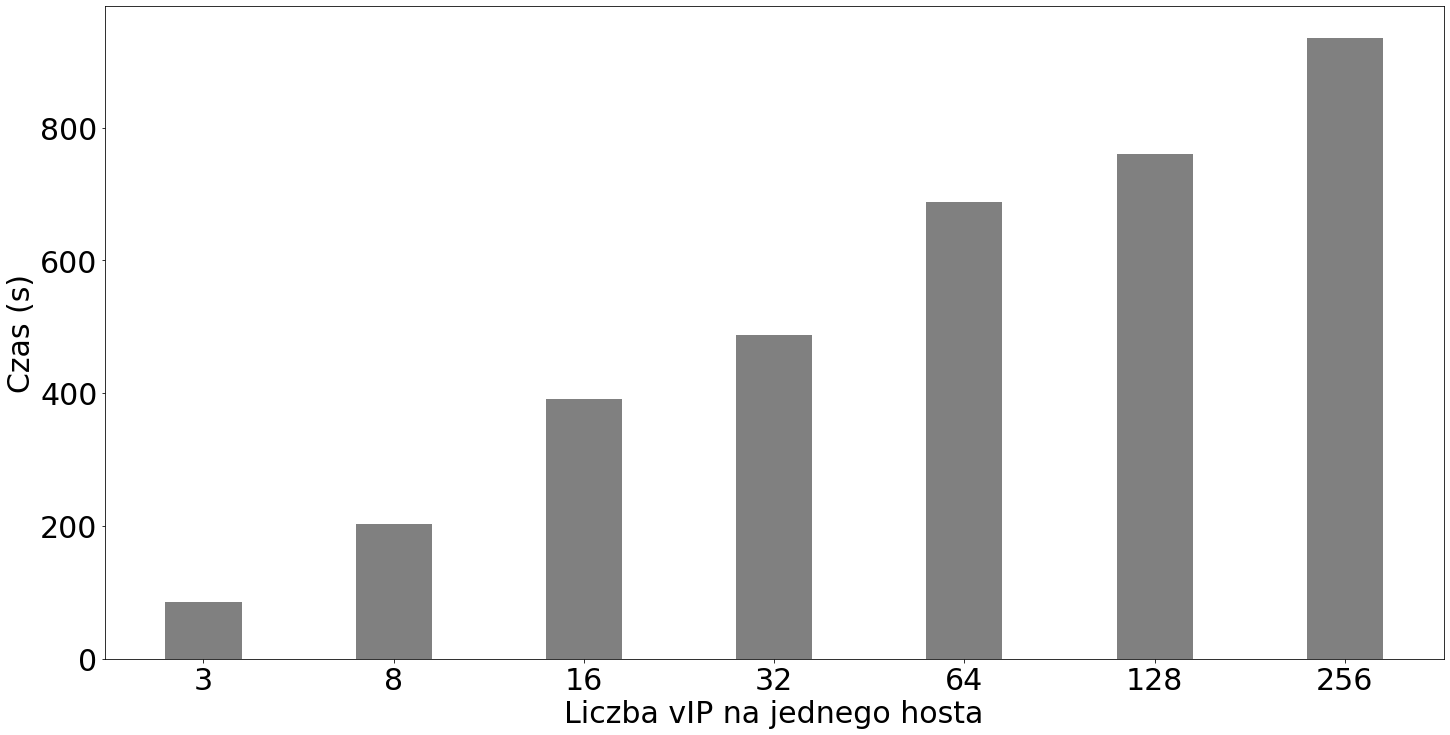

In [295]:
plot_data_avg_time = {
    '3': res_df_3[0],
    '8': res_df_8[0],
    '16': res_df_16[0],
    '32': res_df_32[0],
    '64': res_df_64[0],
    '128': res_df_128[0],
    '256': res_df_256[0]
}

fig = plt.figure(figsize =(24, 12))
plt.bar(plot_data_avg_time.keys(), plot_data_avg_time.values(), color ='gray',
        width = 0.4)
plt.xlabel("Liczba vIP na jednego hosta")
plt.ylabel("Czas (s)")
# plt.title("Średni czas powtórzenia vIP w zależności od zakresu przydzielonych adresów vIP")
plt.show()

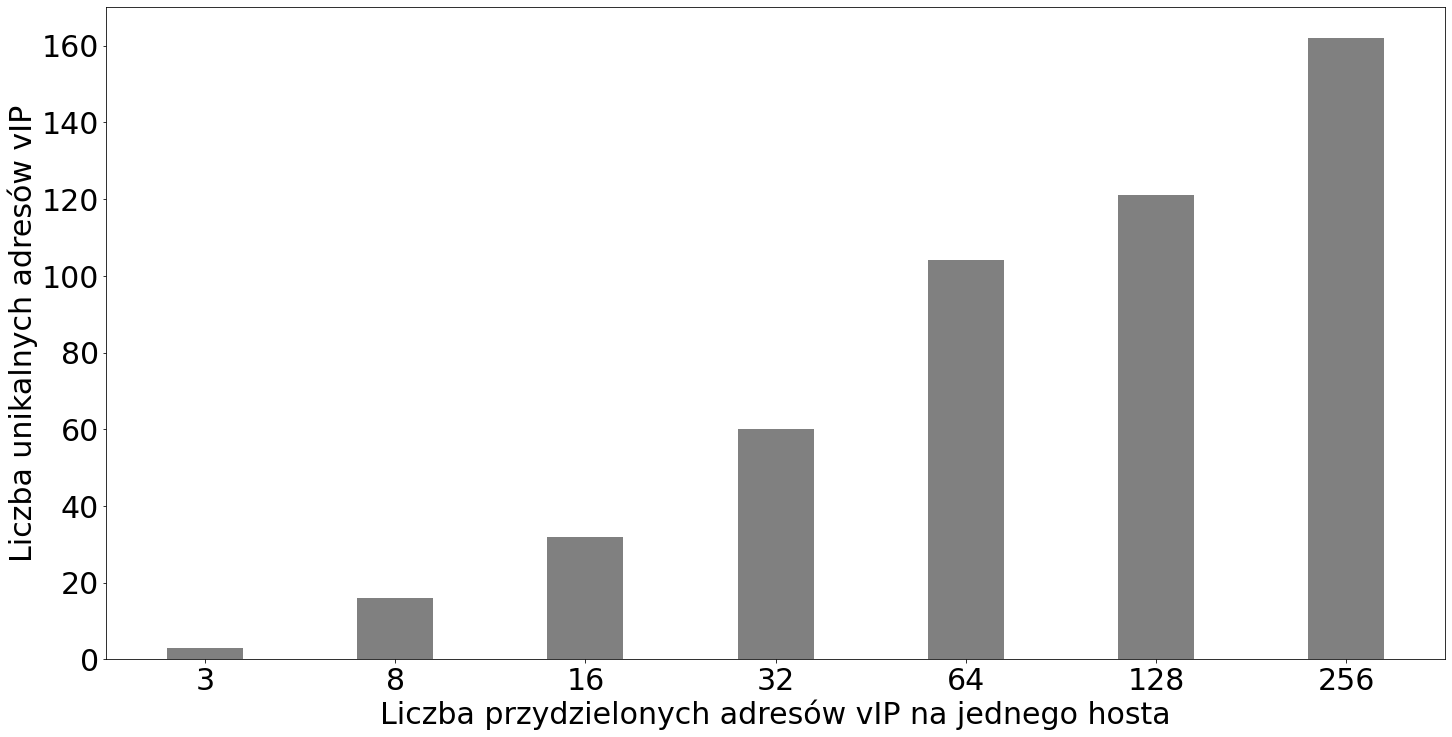

In [294]:
plot_data_unique_ip = {
    '3': res_df_3[1],
    '8': res_df_8[1],
    '16': res_df_16[1],
    '32': res_df_32[1],
    '64': res_df_64[1],
    '128': res_df_128[1],
    '256': res_df_256[1]
}

fig = plt.figure(figsize =(24, 12))
plt.bar(plot_data_unique_ip.keys(), plot_data_unique_ip.values(), color ='gray',
        width = 0.4)
plt.xlabel("Liczba przydzielonych adresów vIP na jednego hosta")
plt.ylabel("Liczba unikalnych adresów vIP")
# plt.title("Liczba unikalnych adresów vIP w zależności od zakresu przydzielonych adresów vIP")
plt.show()

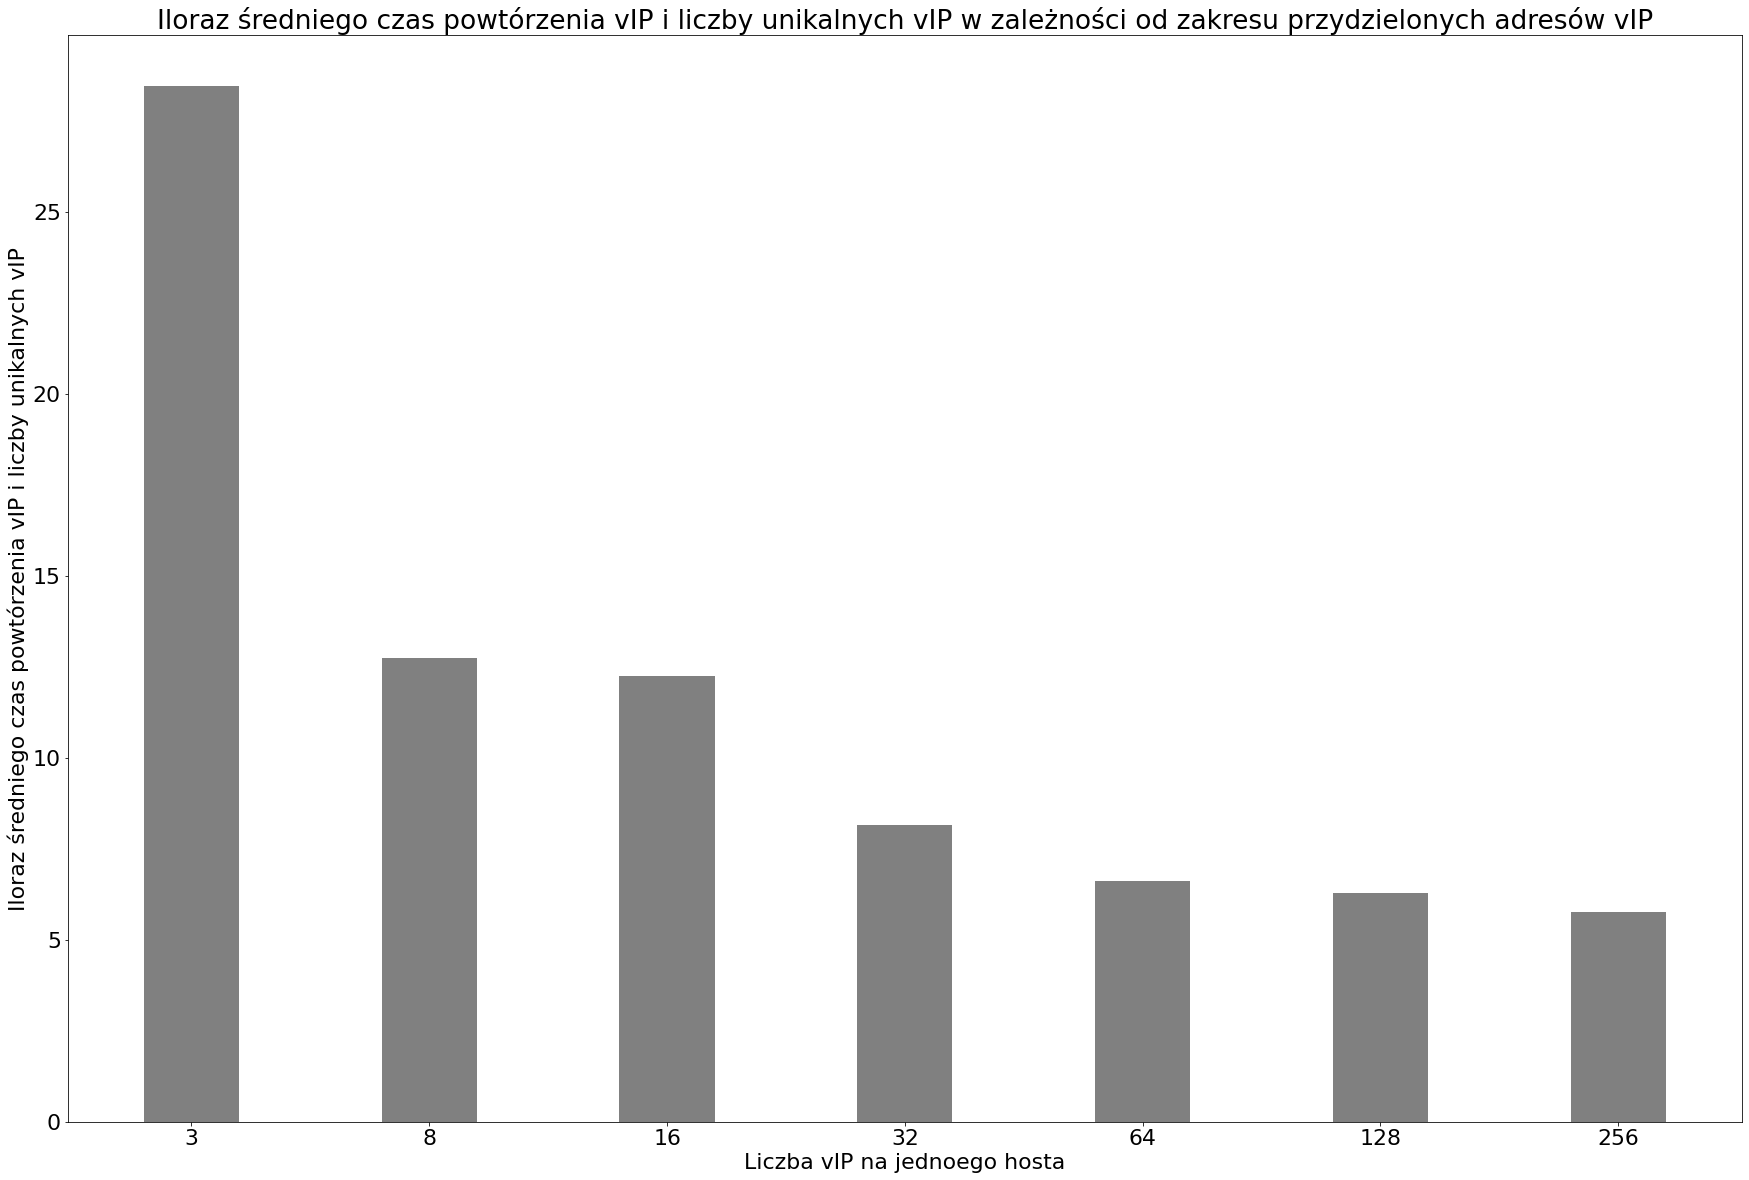

In [ ]:
plot_data_time_to_num_host = {
    '3': res_df_3[2],
    '8': res_df_8[2],
    '16': res_df_16[2],
    '32': res_df_32[2],
    '64': res_df_64[2],
    '128': res_df_128[2],
    '256': res_df_256[2]
}

fig = plt.figure(figsize =(22, 12))
plt.bar(plot_data_time_to_num_host.keys(), plot_data_time_to_num_host.values(), color ='gray',
        width = 0.4)
plt.xlabel("Liczba vIP na jednego hosta")
plt.ylabel("Iloraz średniego czas powtórzenia vIP i liczby unikalnych vIP")
plt.title("Iloraz średniego czas powtórzenia vIP i liczby unikalnych vIP w zależności od zakresu przydzielonych adresów vIP")
plt.show()

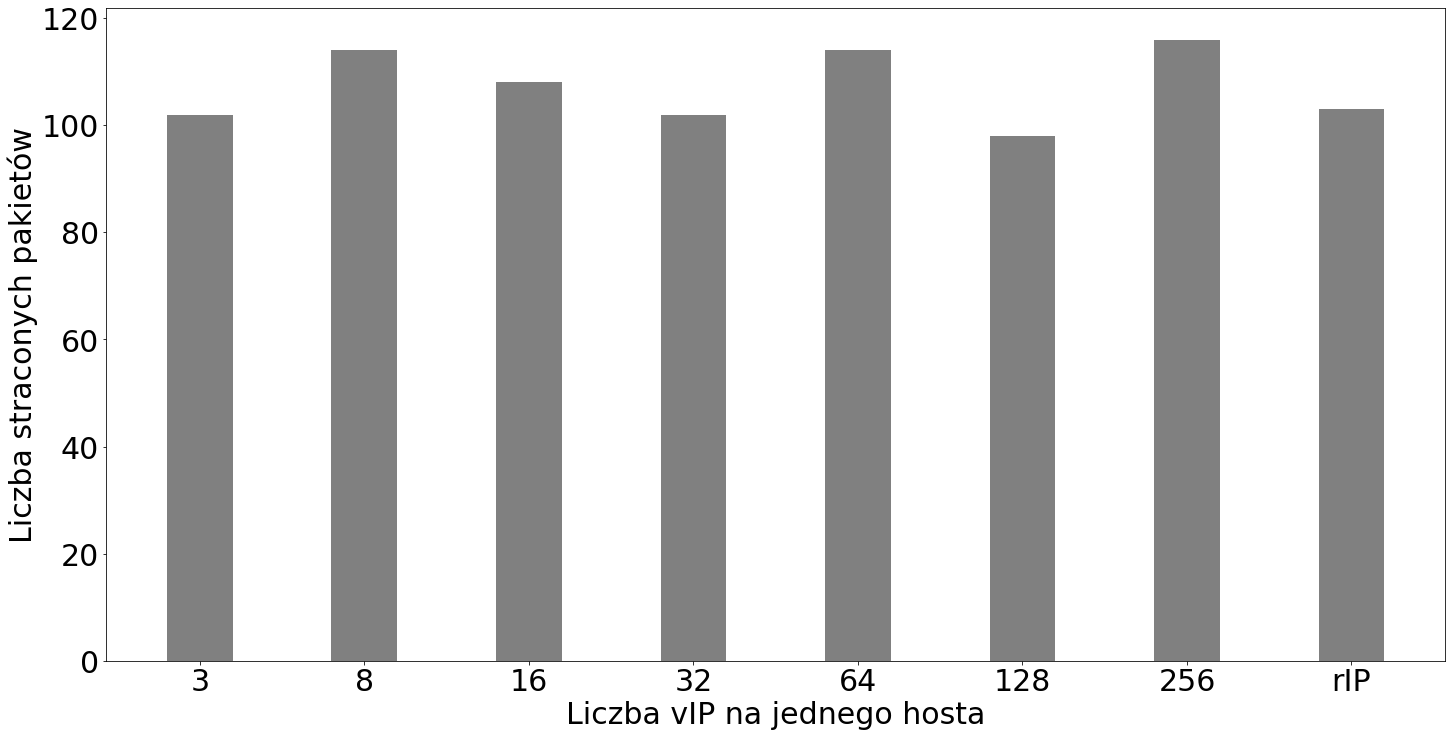

In [293]:
plot_data_time_to_num_host = {
    '3': res_df_3[3],
    '8': res_df_8[3],
    '16': res_df_16[3],
    '32': res_df_32[3],
    '64': res_df_64[3],
    '128': res_df_128[3],
    '256': res_df_256[3],
    'rIP': res_df_rip[3]
}

fig = plt.figure(figsize =(24, 12))
plt.bar(plot_data_time_to_num_host.keys(), plot_data_time_to_num_host.values(), color ='gray',
        width = 0.4)
plt.xlabel("Liczba vIP na jednego hosta")
plt.ylabel("Liczba straconych pakietów")
# plt.title("Liczba straconych pakietów vIP w zależności od zakresu przydzielonych adresów vIP")
plt.show()